## Data generation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

'conda' 不是內部或外部命令、可執行的程式或批次檔。


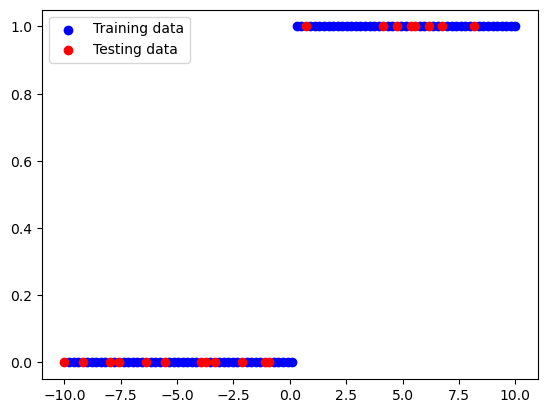

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# randomseed
np.random.seed(0)

# data : y = ax+b
a = 2
b = 1
noise_scale = 0.1

# data generation
# x = np.linspace(0, 50, 100)
# q = np.random.normal(0, noise_scale, x.shape)
# y = a * x + b + q

# # data : y = a*exp(bx)
# a = 2
# b = 1
# c= 50
# noise_scale = 20

x = np.linspace(-10, 10, 100)
q = np.random.normal(0, noise_scale, x.shape)
y = 1 / (1 + np.exp(-x))+q
y_binary = np.where(y > 0.5, 1, 0)
# # data generation
# x = np.linspace(0, 5, 100)
# y = a * np.exp(b * x) + q + c

from sklearn.preprocessing import StandardScaler

## Data standardization
# scaler = StandardScaler()
# x_nor = scaler.fit_transform(x.reshape(-1, 1))

# splitting dataset to training set and testing set 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y_binary, test_size=0.2, random_state=42)

#  data visualization
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.legend()
plt.show()


## Build ANN model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(1,), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Sequential.help
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy',metrics=['accuracy'])


## Training ANN model

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=20, callbacks=[early_stop])

Epoch 1/1000
4/4 [==============================] - 3s 216ms/step - loss: 2.0228 - accuracy: 0.0000e+00 - val_loss: 1.9346 - val_accuracy: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.5548 - accuracy: 0.0312 - val_loss: 1.4732 - val_accuracy: 0.0000e+00
Epoch 3/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.2125 - accuracy: 0.0938 - val_loss: 1.0851 - val_accuracy: 0.1250
Epoch 4/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.9279 - accuracy: 0.2656 - val_loss: 0.7767 - val_accuracy: 0.5625
Epoch 5/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6904 - accuracy: 0.7188 - val_loss: 0.5836 - val_accuracy: 0.9375
Epoch 6/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.5767 - accuracy: 1.0000 - val_loss: 0.4768 - val_accuracy: 1.0000
Epoch 7/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.4984 - accuracy: 0.9531 - val_loss: 0.3944 - val_accuracy: 1.0000


## Model evaluation

3/3 [==============================] - 0s 7ms/step - loss: 0.0664 - accuracy: 1.0000
Accuracy_testing: 1.0
Accuracy_training: 1.0


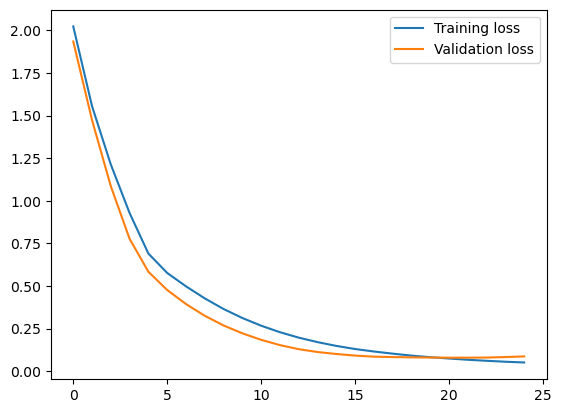

In [4]:
loss, Accuracy_testing = model.evaluate(x_test, y_test)
loss, Accuracy_training = model.evaluate(x_train, y_train)

print(f'Accuracy_testing: {Accuracy_testing}')
print(f'Accuracy_training: {Accuracy_training}')

# print the training histroy
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 226ms/step


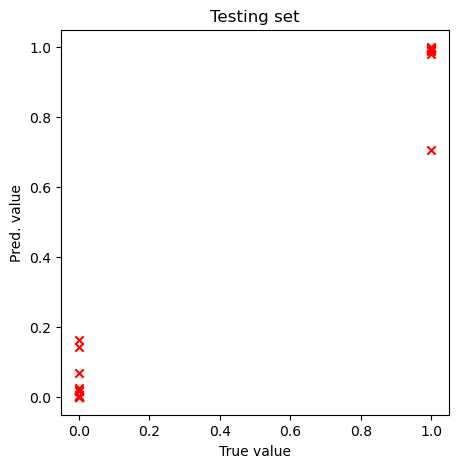

3/3 [==============================] - 0s 5ms/step


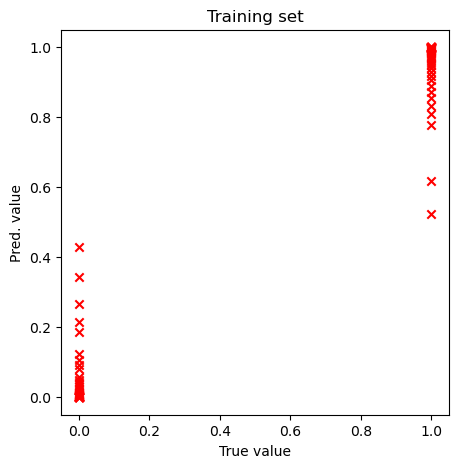

In [5]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


3/3 [==============================] - 0s 5ms/step


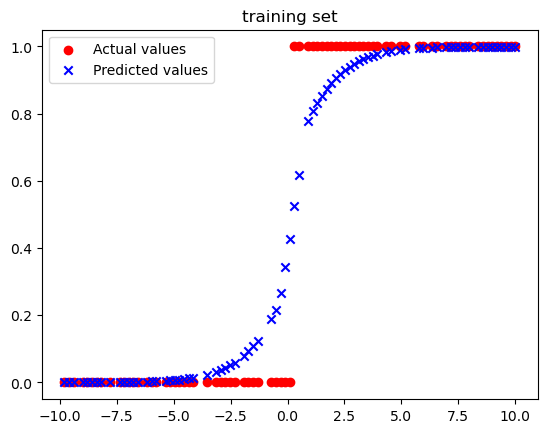

1/1 [==============================] - 0s 59ms/step


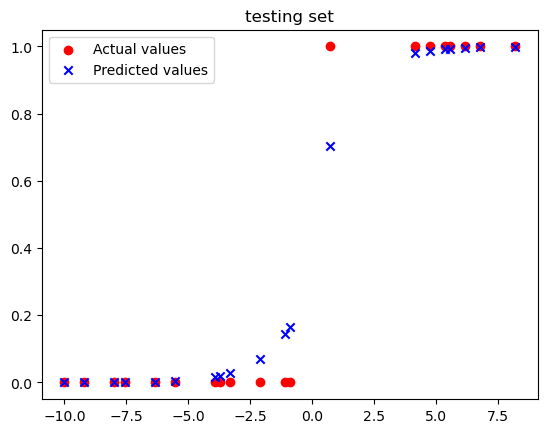

In [6]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='red', label='Actual values')
plt.scatter(x_train, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


# 使用模型进行预测
y_pred = model.predict(x_test)
# 可视化真实值与预测值
plt.scatter(x_test, y_test, color='red', label='Actual values')
plt.scatter(x_test, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_train, y_pred)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

3/3 [==============================] - 0s 4ms/step
Confusion Matrix:
[[39  0]
 [41  0]]


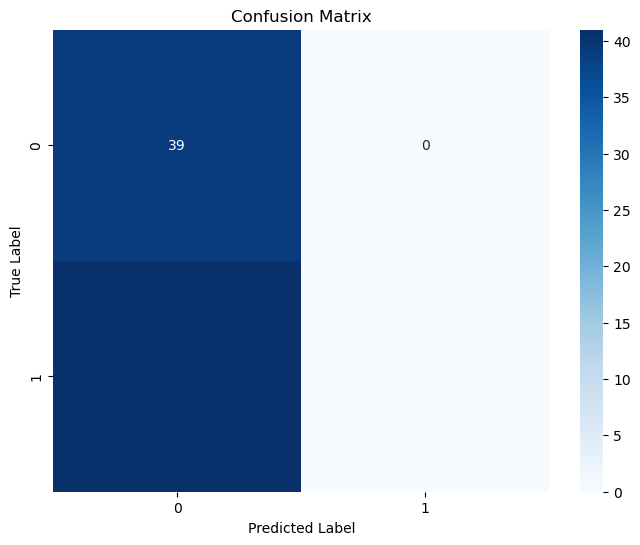

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()